LINK VIDIO : https://binusianorg-my.sharepoint.com/personal/evelyn_untariady_binus_ac_id/_layouts/15/guestaccess.aspx?share=EflTcXNpkORFuF9zLmcOMx4BS-RFkojGWtJzqd_d38RG3Q&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=fhxojo

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os


In [30]:
zip_ref = zipfile.ZipFile("A_23.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [31]:
image_data = []
image_size = (100, 100)

In [32]:
from PIL import Image
for file in os.listdir('A_23'):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join('A_23', file)).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img) / 255.0
        image_data.append(img_array)

In [33]:
image_data = np.array(image_data)
print("Image shape:", image_data.shape)

Image shape: (1074, 100, 100, 3)


# [LO1, LO2, LO4 – 5 poin] Untuk mengenali data, anda perlu melakukan EDA kemudian menjelaskan EDA apa yang anda lakukan dan informasi apa yang anda peroleh dengan EDA tersebut, serta alasan mengapa anda perlu mengetahui informasi tersebut.

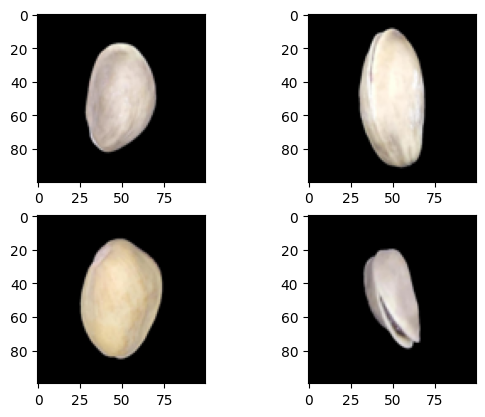

In [34]:
plt.subplot(221)
plt.imshow(image_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(image_data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(image_data[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(image_data[3], cmap=plt.get_cmap('gray'))
plt.show()

In [35]:
print("Rata-rata pixel:", image_data.mean())
print("Std pixel:", image_data.std())

Rata-rata pixel: 0.18767574846946855
Std pixel: 0.3401518118595268


# [LO1, LO2, LO4 – 5 poin] Untuk pemodelan, anda perlu untuk membagi data menjadi 80% training, 10% validasi dan 10% testing, meresize image menjadi 100 x 100, dan membuat data yang mengandung noise sesuai ketentuan di atas

## Split data

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_temp = train_test_split(image_data, test_size=0.2, random_state=42)


In [37]:
x_val, x_test = train_test_split(x_temp, test_size=0.5, random_state=42)

In [38]:
print(f"Train: {x_train.shape}")
print(f"Validation: {x_val.shape}")
print(f"Test: {x_test.shape}")

Train: (859, 100, 100, 3)
Validation: (107, 100, 100, 3)
Test: (108, 100, 100, 3)


## Add Noise

In [39]:
noise_factor = 0.2
x_train_noisy = x_train +  np.random.normal(loc=0.0, scale=0.1, size=x_train.shape)
x_test_noisy = x_test +  np.random.normal(loc=0.0, scale=0.1, size=x_test.shape)
x_val_noisy = x_val +  np.random.normal(loc=0.0, scale=0.1, size=x_val.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

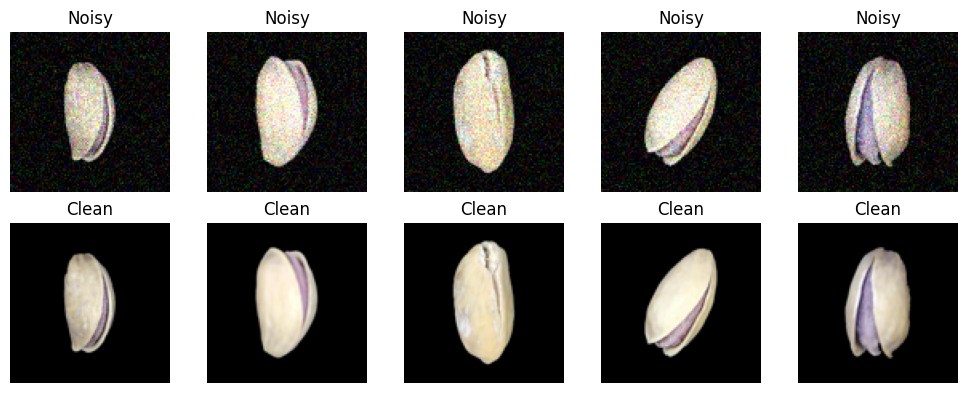

In [51]:
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    plt.subplot(2, 5, i+5+1)
    plt.imshow(x_train[i])
    plt.title("Clean")
    plt.axis('off')
plt.tight_layout()
plt.show()

# [LO1, LO2, LO3, LO4 – 10 poin] Membangun model deep learning autoencoder dengan arsitektur: Dengan semua kernel memiliki dimensi 3 x 3, fungsi aktivasi Relu, kecuali pada layer terakhir menuju output layer menggunakan Sigmoid, optimizer Adam dan loss MSE.  

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Input, Conv2D, MaxPooling2D, UpSampling2D

In [48]:
baseline_model = Sequential([
    Input(shape=(100, 100, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(64, (3,3), activation= 'relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(3, (3,3), activation = 'sigmoid', padding = 'same')
])

In [49]:
baseline_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 100, 100, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

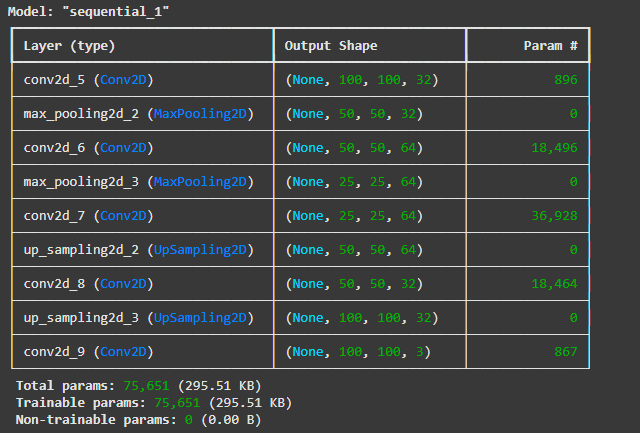

In [50]:
baseline_model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [55]:
history1 = baseline_model.fit(x_train_noisy, x_train, validation_data=(x_val_noisy, x_val), epochs=50, batch_size=32, callbacks = [early_stop], verbose = 1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 0.0014 - val_loss: 0.0012
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0010 - val_loss: 9.6664e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 9.7280e-04 - val_loss: 9.7426e-04
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 9.8937e-04 - val_loss: 8.6085e-04
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - l

In [56]:
pred_baseline = baseline_model.predict(x_test_noisy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step


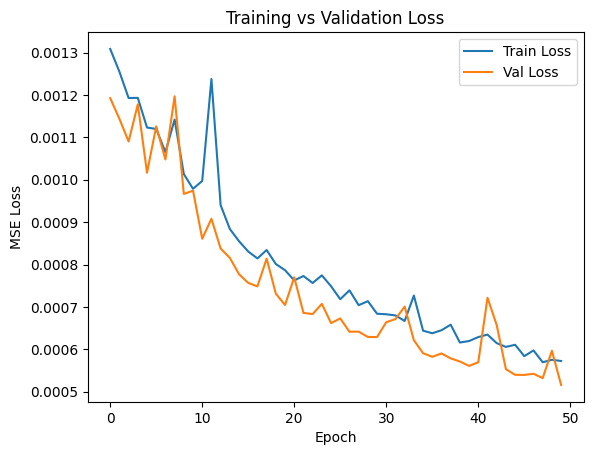

In [58]:
import matplotlib.pyplot as plt

plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


# [LO1, LO2, LO3, LO4 – 10 poin] Lakukan modifikasi model autoencoder yang diberikan, anda dapat mengubah susunan arsitektur encoder atau decodernya

In [62]:
modif_model = Sequential([
    Input(shape=(100, 100, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(128, (3,3), activation= 'relu', padding='same'),

    UpSampling2D((2,2)),
    Conv2D(64, (3,3), activation= 'relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu', padding='same'),
    Conv2D(3, (3,3), activation = 'sigmoid', padding = 'same')
])

In [63]:
from tensorflow.keras.optimizers import Adam
modif_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.001))

In [64]:
history_modif = modif_model.fit(x_train_noisy, x_train, validation_data=(x_val_noisy, x_val), epochs=50, batch_size=32, callbacks = [early_stop], verbose = 1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - loss: 0.1213 - val_loss: 0.0036
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - loss: 0.0035 - val_loss: 0.0028
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - loss: 0.0025 - val_loss: 0.0021
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - loss: 0.0021 - val_loss: 0.0024
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0022 - val_loss: 0.0016
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - loss: 0.0011 - val

In [65]:
pred_modif = modif_model.predict(x_test_noisy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 763ms/step


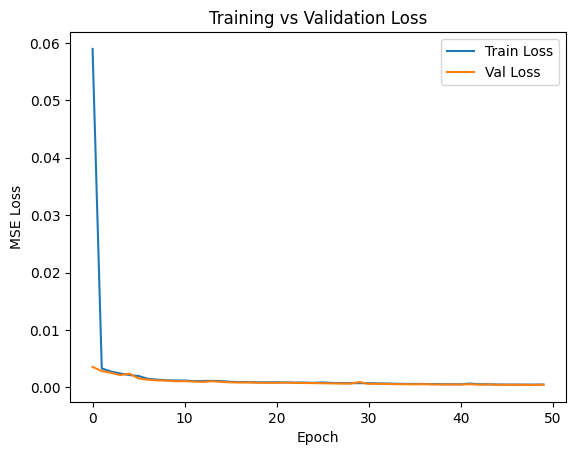

In [66]:
plt.plot(history_modif.history['loss'], label='Train Loss')
plt.plot(history_modif.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


# [LO2, LO3, LO4 – 5 poin] Lakukan evaluasi terhadap model baseline (c) dan model modifikasi (d) dengan menghitung niai SSIMnya, jelaskan analisa anda.

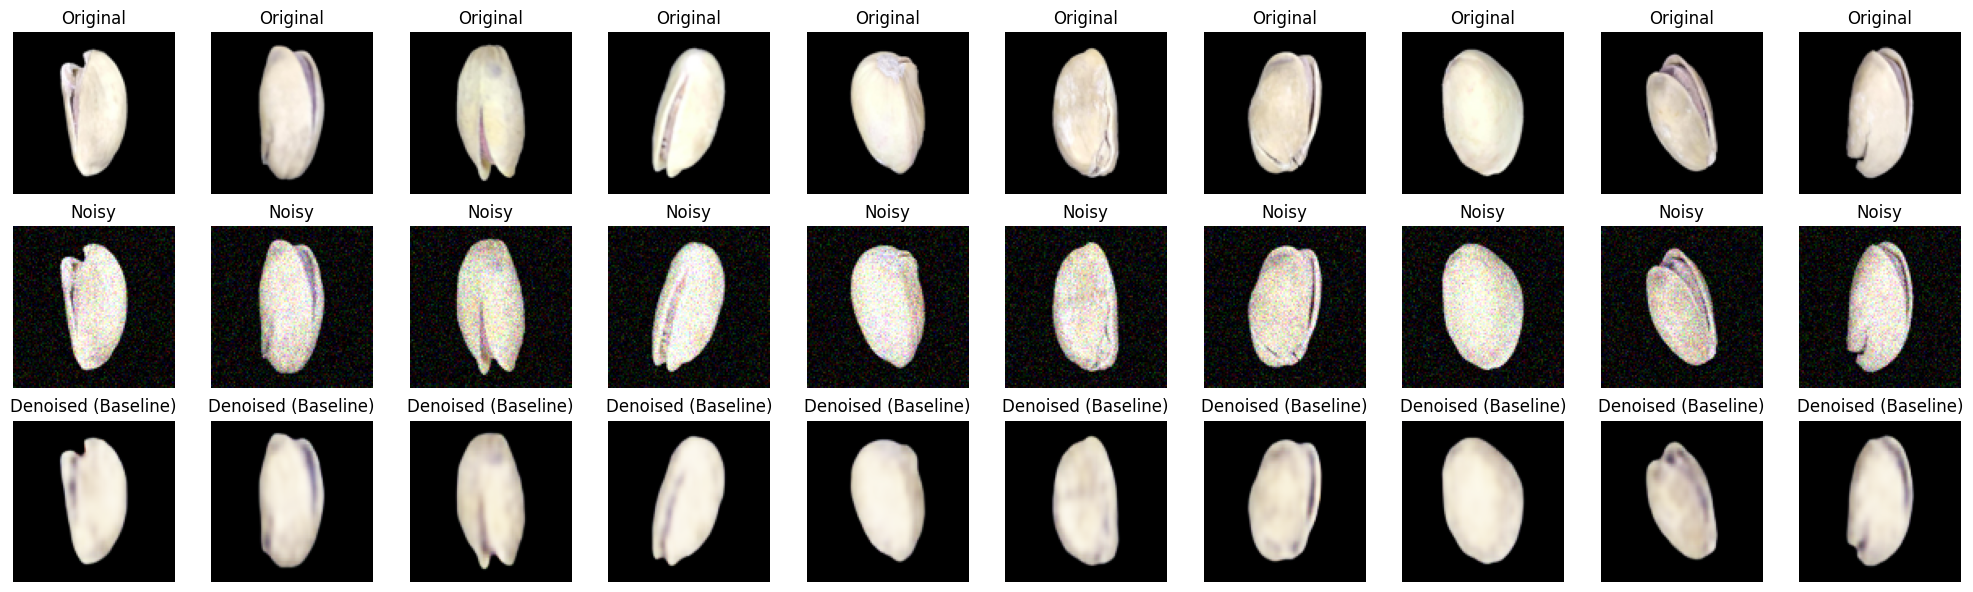

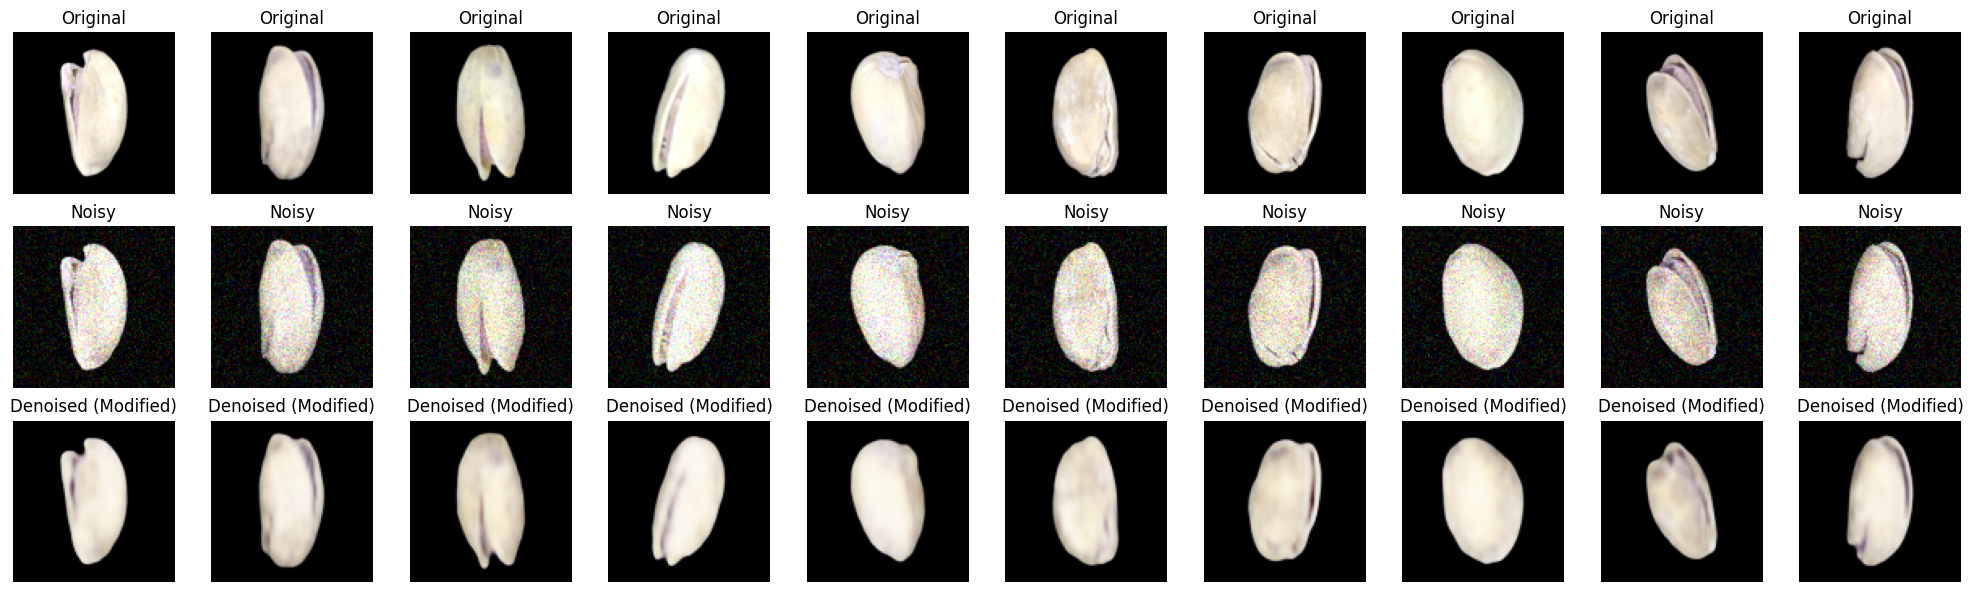

In [75]:
import matplotlib.pyplot as plt
import numpy as np

n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Noisy image
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(pred_baseline[i])
    plt.title("Denoised (Baseline)")
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 6))

for i in range(n):
    # Original image
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Noisy image
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed image (Modified Model)
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(pred_modif[i])
    plt.title("Denoised (Modified)")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Baseline Model

In [82]:
from skimage.metrics import structural_similarity as ssim
score_baseline = ssim(x_test, pred_baseline, channel_axis=3, data_range=1.0)
print("SSIM score (Baseline):", score_baseline)

SSIM score (Baseline): 0.9837899672235816


## Modif Model

In [83]:
from skimage.metrics import structural_similarity as ssim
score_modif = ssim(x_test, pred_modif, channel_axis=3, data_range=1.0)
print("SSIM score (Modified):", score_modif)

SSIM score (Modified): 0.9866991032904745


Dapat dilihat SSIM score model modif lebih besar dibanding SSIM score model baseline. Oleh karena itu dapat disimpulkan bahwa model modif memiliki performa yang lebih baik walaupun hanya sedikit.